In [2]:
# --- 0) Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Make plots clear and consistent
plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams["axes.grid"] = True


In [4]:
# --- 1) Load Dataset ---
# Make sure Iris.csv is in the same folder as your Jupyter Notebook
df = pd.read_csv("Iris.csv")

print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# --- 2) Data Preprocessing ---
# Drop unnecessary columns such as 'Id' and 'Species'
feature_cols = [col for col in df.columns if col.lower() not in ["id", "species"]]
X = df[feature_cols].values

# Scale the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features used for clustering:", feature_cols)


Features used for clustering: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


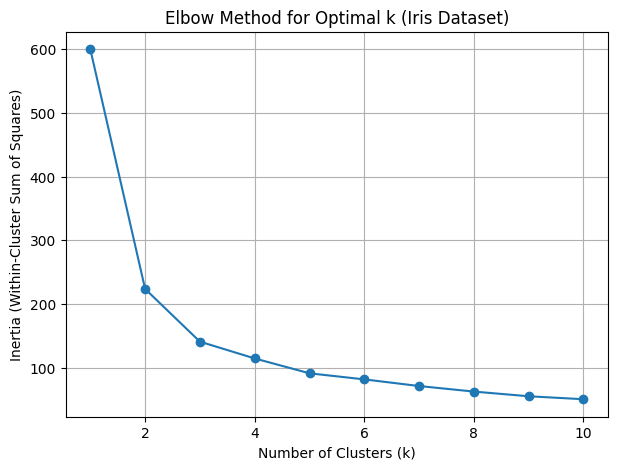

In [8]:
# --- 3) Determine the Optimal Number of Clusters using the Elbow Method ---
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure()
plt.plot(list(K_range), inertias, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k (Iris Dataset)")
plt.show()


In [10]:
# --- 4) Find the Optimal K programmatically (optional) ---
def elbow_k(xs, ys):
    x1, y1 = xs[0], ys[0]
    x2, y2 = xs[-1], ys[-1]
    line_vec = np.array([x2 - x1, y2 - y1], dtype=float)
    line_vec /= np.linalg.norm(line_vec)
    
    distances = []
    for x, y in zip(xs, ys):
        p = np.array([x - x1, y - y1], dtype=float)
        proj_len = np.dot(p, line_vec)
        proj = proj_len * line_vec
        perp = p - proj
        distances.append(np.linalg.norm(perp))
        
    return xs[int(np.argmax(distances))]

optimal_k = elbow_k(list(K_range), inertias)
print(f"Optimal number of clusters according to elbow method: k = {optimal_k}")


Optimal number of clusters according to elbow method: k = 3


In [12]:
# --- 5) Apply K-Means Clustering with Optimal k ---
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
df_clusters = df.copy()
df_clusters["Cluster"] = labels

df_clusters.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [14]:
# --- 6) Compare Clusters with Actual Species (if available) ---
if "Species" in df.columns:
    print("Cluster vs Actual Species:")
    print(pd.crosstab(df_clusters["Cluster"], df_clusters["Species"]))


Cluster vs Actual Species:
Species  Iris-setosa  Iris-versicolor  Iris-virginica
Cluster                                              
0                  0               39              14
1                 50                0               0
2                  0               11              36


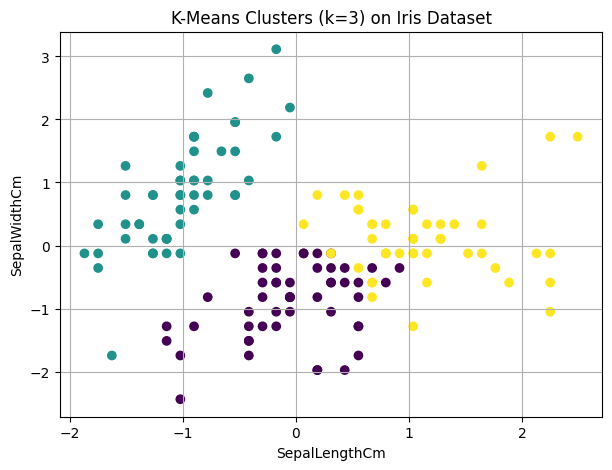

In [16]:
# --- 7) Visualize the Clusters (using Sepal or Petal dimensions) ---
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap="viridis")
plt.xlabel(feature_cols[0])
plt.ylabel(feature_cols[1])
plt.title(f"K-Means Clusters (k={optimal_k}) on Iris Dataset")
plt.show()
